## Proyek Analisis Data: E-Commerce 
- **Nama:** Usriyatul Khamimah
- **Email:** khamimahusriyatul@gmail.com
- **ID Dicoding:** Usriyatul Khamimah

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penggunaan sepeda di musim panas?

- Pertanyaan 2 : Bagaimana tren penggunaan sepeda berdasarkan waktu (jam, hari, dan bulan)?

## Import Semua Packages/Library yang Digunakan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap penggunaan sepeda di musim panas?

- Pertanyaan 2 : Bagaimana tren penggunaan sepeda berdasarkan waktu (jam, hari, dan bulan)?

## Import Semua Packages/Library yang Digunakan

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [25]:
hour_df = pd.read_csv('./data/hour.csv')
day_df = pd.read_csv('./data/day.csv')


### Assessing Data

In [26]:
# Inspect the datasets
print(hour_df.head())
print(day_df.head())

# Statistics and info
print(hour_df.describe())
print(day_df.describe())

print(hour_df.info())
print(day_df.info())

# Check for missing values
print(hour_df.isnull().sum())
print(day_df.isnull().sum())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

### Cleaning Data

In [27]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['hour'] = hour_df['hr']
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
hour_df['month'] = hour_df['dteday'].dt.month_name()

In [28]:
# Mengidentifikasi outliers menggunakan IQR (Interquartile Range)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Contoh deteksi outliers untuk kolom 'cnt'
outliers = detect_outliers(hour_df, 'cnt')
print(f"Outliers in 'cnt':\n{outliers}")

Outliers in 'cnt':
       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
5536      5537 2011-08-23       3   0     8  14        0        2           1   
10358    10359 2012-03-12       1   1     3  17        0        1           1   
10359    10360 2012-03-12       1   1     3  18        0        1           1   
10382    10383 2012-03-13       1   1     3  17        0        2           1   
10383    10384 2012-03-13       1   1     3  18        0        2           1   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
16885    16886 2012-12-11       4   1    12   8        0        2           1   
16909    16910 2012-12-12       4   1    12   8        0        3           1   
16933    16934 2012-12-13       4   1    12   8        0        4           1   
17053    17054 2012-12-18       4   1    12   8        0        2           1   
17077    17078 2012-12-19       4   1    12   8        0        3           1   

       w

## Exploratory Data Analysis (EDA)

### Explore ...

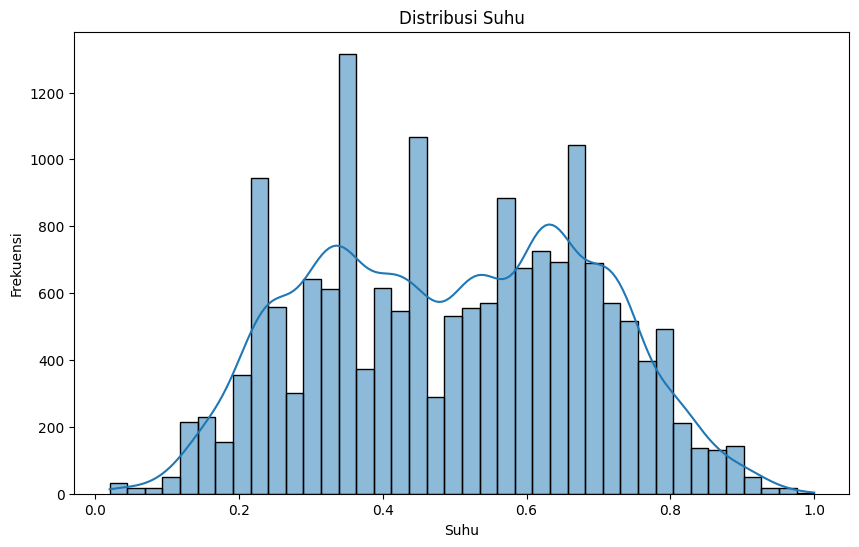

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['temp'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh cuaca terhadap penggunaan sepeda

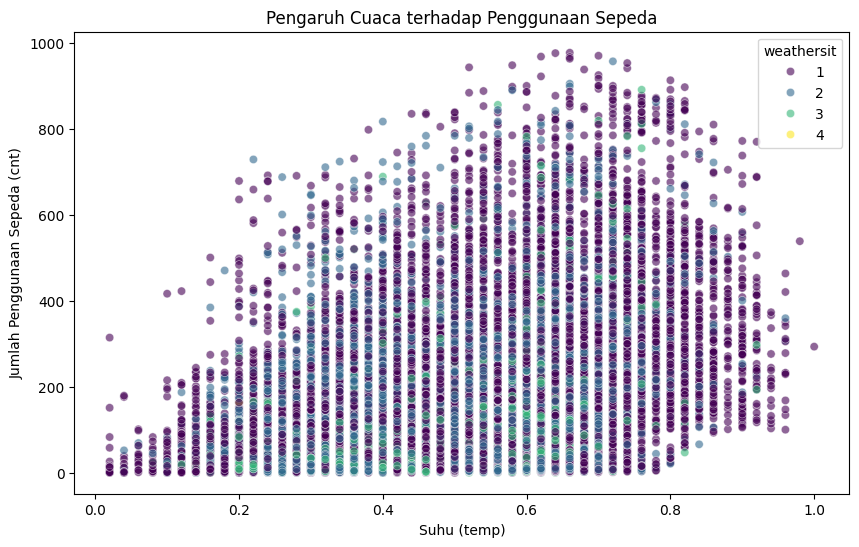

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='temp', y='cnt', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()


### Pertanyaan 2: Tren penggunaan sepeda berdasarkan waktu

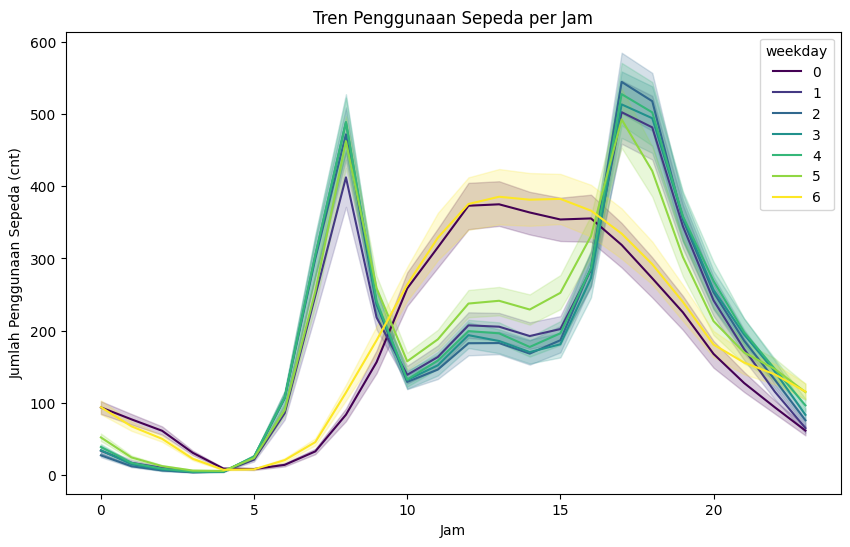

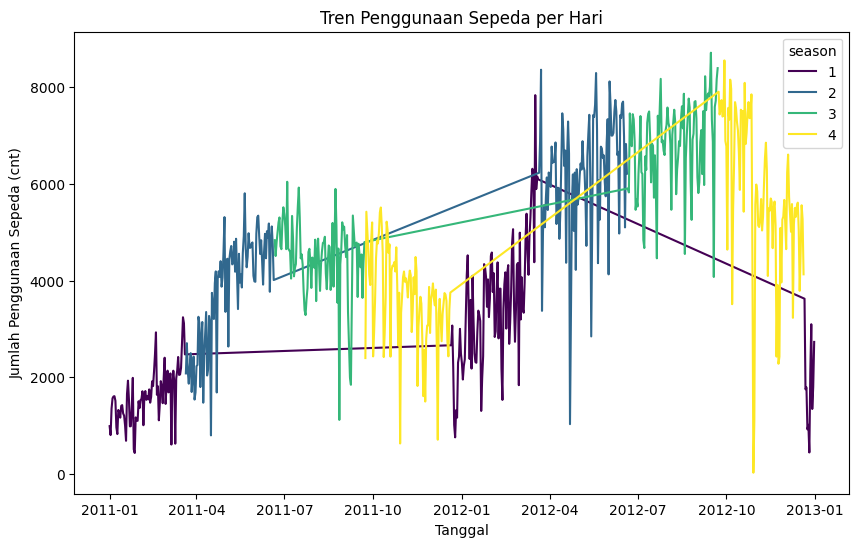

In [31]:
# Tren per jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='weekday', palette='viridis')
plt.title('Tren Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()

# Tren per hari
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='season', palette='viridis')
plt.title('Tren Penggunaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()


## Conclusion

- Conclution pertanyaan 1
Cuaca cerah dan suhu yang nyaman cenderung meningkatkan penggunaan sepeda, sementara cuaca buruk dan suhu ekstrem dapat menurunkan penggunaan.
- Conclution pertanyaan 2
Penggunaan sepeda meningkat pada jam-jam sibuk harian, hari kerja, dan bulan-bulan dengan cuaca baik. Data ini dapat digunakan untuk merencanakan dan meningkatkan layanan berbagi sepeda berdasarkan pola penggunaan yang teridentifikasi.

## Analisis lanjutan

In [32]:
# Menghitung Frequency (frekuensi penggunaan sepeda oleh pengguna casual/registered)
frequency_df = hour_df.groupby('casual')['cnt'].count().reset_index(name='frequency')

# Menghitung Recency (hari terakhir penggunaan sepeda oleh pengguna casual/registered)
recency_df = hour_df.groupby('casual')['dteday'].max().reset_index(name='last_purchase')
# Konversi 'last_purchase' ke dalam jumlah hari sejak hari terakhir di data
max_date = hour_df['dteday'].max()
recency_df['recency'] = (max_date - recency_df['last_purchase']).dt.days

# Menghitung Monetary (jumlah total penggunaan sepeda oleh pengguna casual/registered)
monetary_df = hour_df.groupby('casual')['cnt'].sum().reset_index(name='monetary')

# Menggabungkan semua metrik RFM menjadi satu DataFrame
rfm_df = pd.merge(frequency_df, recency_df[['casual', 'recency']], on='casual')
rfm_df = pd.merge(rfm_df, monetary_df, on='casual')

# Melihat hasil RFM
print(rfm_df)


     casual  frequency  recency  monetary
0         0       1581        0     20920
1         1       1082        1     27181
2         2        798        0     29764
3         3        697        0     38656
4         4        561        0     37314
..      ...        ...      ...       ...
317     356          1      226       672
318     357          1      289       679
319     361          1      226       730
320     362          1       86       743
321     367          1      289       685

[322 rows x 4 columns]
